In [1]:
import tensorflow as tf
import cv2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)

Python version: 3.9.18 (main, Sep 11 2023, 13:30:38) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.10.0
OpenCV version: 4.6.0
NumPy version: 1.26.0


In [6]:
img_array = cv2.imread("Dataset/train/angry/Training_3908.jpg")

In [7]:
img_array.shape

(48, 48, 3)

In [37]:
print(img_array)

[[[ 50  50  50]
  [ 32  32  32]
  [ 15  15  15]
  ...
  [133 133 133]
  [151 151 151]
  [ 86  86  86]]

 [[ 57  57  57]
  [ 34  34  34]
  [ 22  22  22]
  ...
  [138 138 138]
  [151 151 151]
  [ 89  89  89]]

 [[ 61  61  61]
  [ 30  30  30]
  [ 24  24  24]
  ...
  [142 142 142]
  [149 149 149]
  [ 89  89  89]]

 ...

 [[103 103 103]
  [100 100 100]
  [100 100 100]
  ...
  [149 149 149]
  [104 104 104]
  [ 85  85  85]]

 [[107 107 107]
  [111 111 111]
  [113 113 113]
  ...
  [151 151 151]
  [120 120 120]
  [ 86  86  86]]

 [[104 104 104]
  [104 104 104]
  [112 112 112]
  ...
  [143 143 143]
  [136 136 136]
  [ 83  83  83]]]


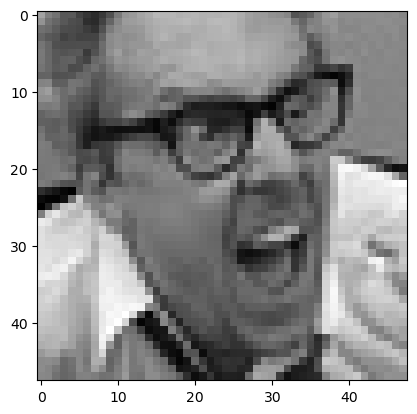

In [8]:
plt.imshow(img_array)

In [12]:
Datadirectory = "Dataset/train/"

In [13]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

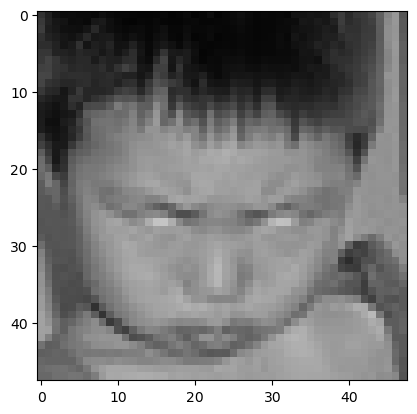

In [19]:
for _ in Classes:
    path = os.path.join(Datadirectory, _)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        # backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show();
        break
    break

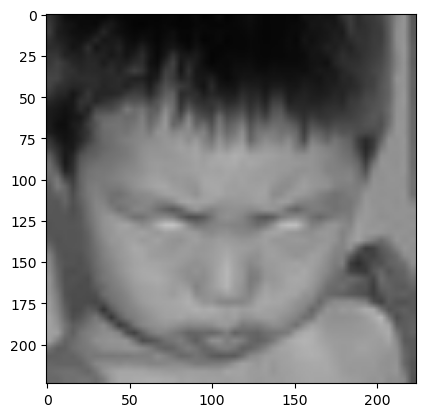

In [20]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,  cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
new_array.shape

(224, 224, 3)

### Real all the image and convert them to array
   

In [26]:
training_Data = []

def create_training_Date():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [27]:
create_training_Date()

In [31]:
print(len(training_Data))

28709


In [29]:
import random
random.shuffle(training_Data)

In [35]:
X = [] # data/feature
Y = [] # label

for features, label in training_Data:
    X.append(features);
    Y.append(label);

X = np.array(X).reshape(-1, img_size, img_size, 3) # Converted to 4D

In [36]:
X.shape

(28709, 224, 224, 3)

### Normalize the data

In [39]:
X = X/255.0 # Normalizing it 

2

## Deep learning Model for training - Transfer learning

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
model = tf.keras.applications.MobileNetV2

In [48]:
model.summary()

AttributeError: 'function' object has no attribute 'summary'